<a href="https://colab.research.google.com/github/Divyesh-2598/Image-Classification/blob/master/PeumoniaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
!unzip -q "/content/drive/My Drive/chest-xray-pneumonia.zip"

replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
!ls

chest_xray  drive  sample_data


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from PIL import Image

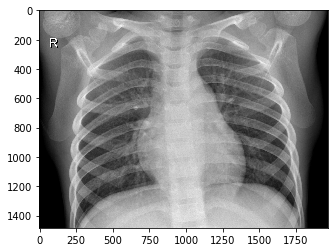

In [44]:
import cv2
DATADIR = "chest_xray/chest_xray/test"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [45]:
print(img_array.shape)

(1484, 1968, 3)


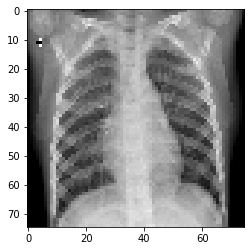

In [67]:
IMG_SIZE = 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [68]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 390/390 [00:03<00:00, 121.01it/s]

624


In [69]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
1
1
0
1
0


In [70]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

[[[[15 15 15]
   [13 13 13]
   [10 10 10]
   ...
   [15 15 15]
   [ 0  0  0]
   [ 1  1  1]]

  [[12 12 12]
   [13 13 13]
   [13 13 13]
   ...
   [25 25 25]
   [21 21 21]
   [ 7  7  7]]

  [[11 11 11]
   [10 10 10]
   [33 33 33]
   ...
   [51 51 51]
   [52 52 52]
   [10 10 10]]

  ...

  [[17 17 17]
   [13 13 13]
   [ 2  2  2]
   ...
   [30 30 30]
   [17 17 17]
   [ 0  0  0]]

  [[17 17 17]
   [12 12 12]
   [ 8  8  8]
   ...
   [33 33 33]
   [ 1  1  1]
   [ 0  0  0]]

  [[16 16 16]
   [13 13 13]
   [14 14 14]
   ...
   [33 33 33]
   [ 0  0  0]
   [ 1  1  1]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [74]:
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(624, 75, 75, 3) float64
(624,) int64


In [75]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 436 samples, validate on 188 samples
Epoch 1/10
436/436 [==============================] - 47s 108ms/sample - loss: 1.5062 - acc: 0.5528 - val_loss: 0.6554 - val_acc: 0.6436
Epoch 2/10
436/436 [==============================] - 43s 98ms/sample - loss: 0.6416 - acc: 0.6697 - val_loss: 0.5193 - val_acc: 0.8564
Epoch 3/10
436/436 [==============================] - 43s 98ms/sample - loss: 0.3994 - acc: 0.8417 - val_loss: 0.3579 - val_acc: 0.8457
Epoch 4/10
436/436 [==============================] - 43s 98ms/sample - loss: 0.2747 - acc: 0.8830 - val_loss: 0.3343 - val_acc: 0.8617
Epoch 5/10
436/436 [==============================] - 43s 98ms/sample - loss: 0.2394 - acc: 0.9014 - val_loss: 0.3779 - val_acc: 0.8511
Epoch 6/10
436/436 [==============================] - 43s 98ms/sample - loss: 0.2680 - acc: 0.8761 - val_loss: 0.2635 - val_acc: 0.8936
Epoch 7/10
436/436 [==============================] - 43s 99ms/sample - loss: 0.1900 - acc: 0.9312 - val_loss: 0.2542 - val_acc: 0.8936
E

In [93]:
def prepare(filepath):
    IMG_SIZE = 75
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')])
print(CATEGORIES[int(predictions[0][0])])

PNEUMONIA


In [0]:
from keras import layers
from keras import models
from keras.applications import InceptionResNetV2

In [0]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75,75,3))

In [79]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, 37, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_407 (BatchN (None, 37, 37, 32)   96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_407 (Activation)     (None, 37, 37, 32)   0           batch_normalization_407[0][0]    
________________________________________________________________________________

In [0]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [82]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)



Train on 436 samples, validate on 188 samples
Epoch 1/10
436/436 [==============================] - 118s 271ms/step - loss: 0.6699 - acc: 0.6193 - val_loss: 0.5811 - val_acc: 0.6596
Epoch 2/10
436/436 [==============================] - 81s 185ms/step - loss: 0.4673 - acc: 0.7959 - val_loss: 0.7834 - val_acc: 0.7606
Epoch 3/10
436/436 [==============================] - 82s 189ms/step - loss: 0.3361 - acc: 0.8991 - val_loss: 0.7406 - val_acc: 0.7713
Epoch 4/10
436/436 [==============================] - 80s 185ms/step - loss: 0.2625 - acc: 0.9312 - val_loss: 0.5267 - val_acc: 0.8032
Epoch 5/10
436/436 [==============================] - 81s 185ms/step - loss: 0.1909 - acc: 0.9587 - val_loss: 0.4775 - val_acc: 0.8351
Epoch 6/10
436/436 [==============================] - 81s 185ms/step - loss: 0.1856 - acc: 0.9564 - val_loss: 0.4652 - val_acc: 0.8351
Epoch 7/10
436/436 [==============================] - 81s 186ms/step - loss: 0.1495 - acc: 0.9633 - val_loss: 0.4343 - val_acc: 0.8511
Epoch 

In [92]:
def prepare(filepath):
    IMG_SIZE = 75
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')])
print(CATEGORIES[int(predictions[0][0])])

PNEUMONIA
